In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr

In [6]:
data_dir = r'C:\Users\anshul\Desktop\MS\Subjects\Spring 2022\Data Analytics\FINAL PROJECT\Image recognition\ImageDataSet'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\anshul\Desktop\MS\Subjects\Spring 2022\Data Analytics\FINAL PROJECT\Image recognition\ImageDataSet')

Found 2218 files belonging to 19 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

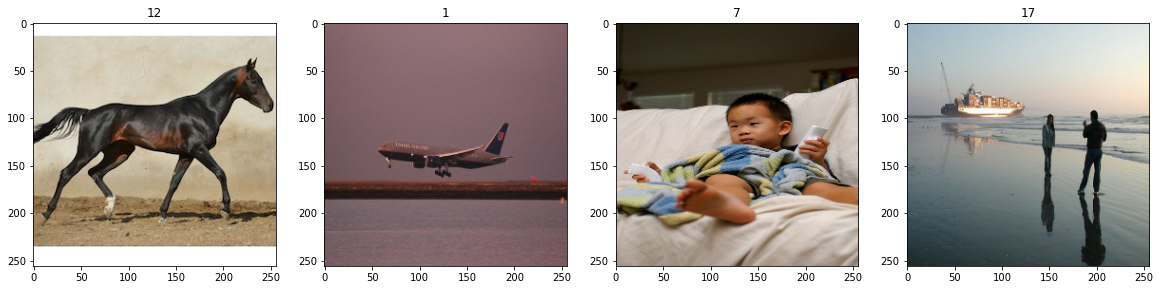

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.21013327, 0.20229013, 0.21405484],
          [0.20782782, 0.19998468, 0.21369486],
          [0.22447151, 0.21662837, 0.22839308],
          ...,
          [0.18556985, 0.16204044, 0.1424326 ],
          [0.17449449, 0.14997703, 0.13333334],
          [0.16470589, 0.1392157 , 0.1254902 ]],
 
         [[0.18039216, 0.1764706 , 0.17450981],
          [0.18821998, 0.18624388, 0.18723193],
          [0.20062806, 0.20062806, 0.20062806],
          ...,
          [0.24313726, 0.27286306, 0.17976409],
          [0.18423714, 0.21168812, 0.13229932],
          [0.15294118, 0.17843138, 0.11046262]],
 
         [[0.18561581, 0.18561581, 0.18561581],
          [0.1902114 , 0.1902114 , 0.1902114 ],
          [0.19866727, 0.19082414, 0.1947457 ],
          ...,
          [0.78682595, 0.7456495 , 0.68878675],
          [0.70366114, 0.68510264, 0.6291973 ],
          [0.4133655 , 0.40748316, 0.37154564]],
 
         ...,
 
         [[0.21894914, 0.1248315 , 0.18757659],
          [0.19419

In [16]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [17]:
train_size


49

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0

In [25]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
history = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
49/49 [==============================] - 195s 4s/step - loss: -7698545.5000 - accuracy: 0.0529 - val_loss: -61388572.0000 - val_accuracy: 0.0491
Epoch 2/50
49/49 [==============================] - 190s 4s/step - loss: -1477824384.0000 - accuracy: 0.0529 - val_loss: -6398930944.0000 - val_accuracy: 0.0357
Epoch 3/50
49/49 [==============================] - 187s 4s/step - loss: -33440182272.0000 - accuracy: 0.0517 - val_loss: -95138988032.0000 - val_accuracy: 0.0424
Epoch 4/50
49/49 [==============================] - 171s 3s/step - loss: -275254181888.0000 - accuracy: 0.0517 - val_loss: -634191937536.0000 - val_accuracy: 0.0402
Epoch 5/50
49/49 [==============================] - 185s 4s/step - loss: -1302013804544.0000 - accuracy: 0.0542 - val_loss: -2451213385728.0000 - val_accuracy: 0.0379
Epoch 6/50
49/49 [==============================] - 172s 3s/step - loss: -4419848503296.0000 - accuracy: 0.0529 - val_loss: -7427461742592.0000 - val_accuracy: 0.0491
Epoch 7/50
49/49 [===

49/49 [==============================] - 88s 2s/step - loss: -259639173999230976.0000 - accuracy: 0.0510 - val_loss: -279110614394077184.0000 - val_accuracy: 0.0402
Epoch 49/50
49/49 [==============================] - 94s 2s/step - loss: -280147797456453632.0000 - accuracy: 0.0529 - val_loss: -291035402112860160.0000 - val_accuracy: 0.0402
Epoch 50/50
49/49 [==============================] - 93s 2s/step - loss: -308520935529381888.0000 - accuracy: 0.0536 - val_loss: -329049607893942272.0000 - val_accuracy: 0.0335


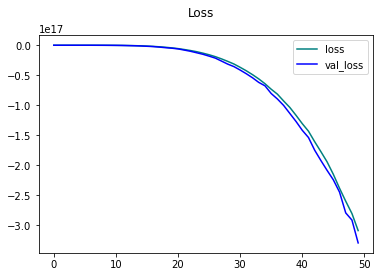

In [27]:
figure = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
figure.suptitle('Loss')
plt.legend()
plt.show()

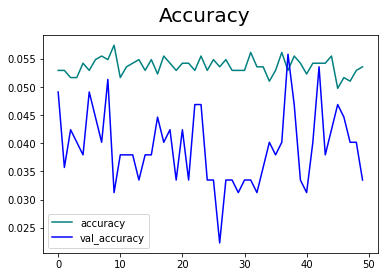

In [28]:
figure1 = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
figure1.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()